In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 2차원 데이터 생성
np.random.seed(42)
num_points = 1000
mean = [0,0]
cov = [[1,0],[0,1]]
data_2d = np.random.multivariate_normal(mean,cov,num_points)

len(data_2d)

1000

[[-0.04842793  0.12654788 -0.13349653]
 [ 1.18996517  1.57642031 -0.8433641 ]
 [-0.48097256  0.25952275 -0.67025422]
 ...
 [ 0.72482927  1.25770075 -0.85391655]
 [-0.83057289 -0.38573081 -0.18027968]
 [-0.80296533 -0.22149229 -0.35800225]]


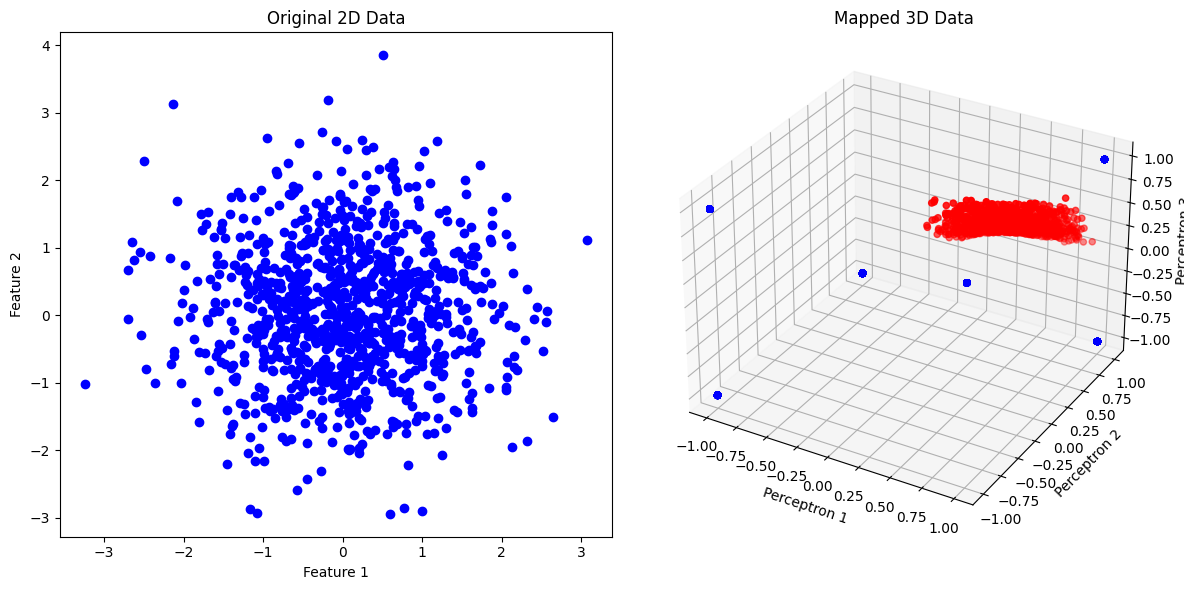

In [22]:

# 퍼셉트론 가중치 및 편향
weights = np.array([[0.5, 0.7], [-0.3, 0.9], [0.8, -0.5]])
biases = np.array([-0.2, 0.4, -0.6])

# 3개의 퍼셉트론 및 시그모이드 함수로 3차원으로 매핑
mapped_data = np.dot(data_2d, weights.T) + biases
mapped_data_3d = 1 / (1 + np.exp(-mapped_data))
mapped_data_step = np.where(mapped_data >=0, 1, -1 )
# 시각화
fig = plt.figure(figsize=(12, 6))

# 2차원 데이터
ax1 = fig.add_subplot(121)
ax1.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', marker='o')
ax1.set_title('Original 2D Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# 3차원으로 매핑된 데이터
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(mapped_data_3d[:, 0], mapped_data_3d[:, 1], mapped_data_3d[:, 2], c='red', marker='o')
ax2.scatter(mapped_data_step[:,0], mapped_data_step[:,1], mapped_data_step[:,2], c='blue', marker='o')
ax2.set_title('Mapped 3D Data')
ax2.set_xlabel('Perceptron 1')
ax2.set_ylabel('Perceptron 2')
ax2.set_zlabel('Perceptron 3')

plt.tight_layout()
plt.show()

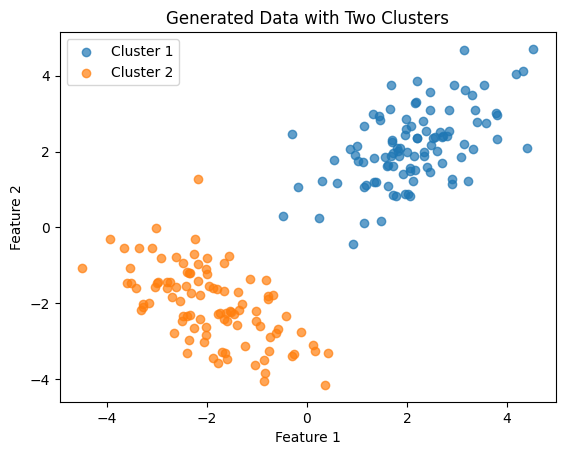

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 클러스터 정규분포
mean1 = [2, 2]
cov1 = [[1, 0.5], [0.5, 1]]

# 두 번째 클러스터 정규분포
mean2 = [-2, -2]
cov2 = [[1, -0.5], [-0.5, 1]]

# 각 클러스터에서 100개의 샘플 생성
cluster1 = np.random.multivariate_normal(mean1, cov1, 100)
cluster2 = np.random.multivariate_normal(mean2, cov2, 100)

# 시각화
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='Cluster 1', alpha=0.7)
plt.scatter(cluster2[:, 0], cluster2[:, 1], label='Cluster 2', alpha=0.7)
plt.title('Generated Data with Two Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()



/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_25716/2151403611.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  cluster1 = np.random.multivariate_normal(mean1, cov1, 100000)
/var/folders/jt/wdzz0gk517j7x5vf91vd8v4r0000gn/T/ipykernel_25716/2151403611.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  cluster2 = np.random.multivariate_normal(mean2, cov2, 100000)


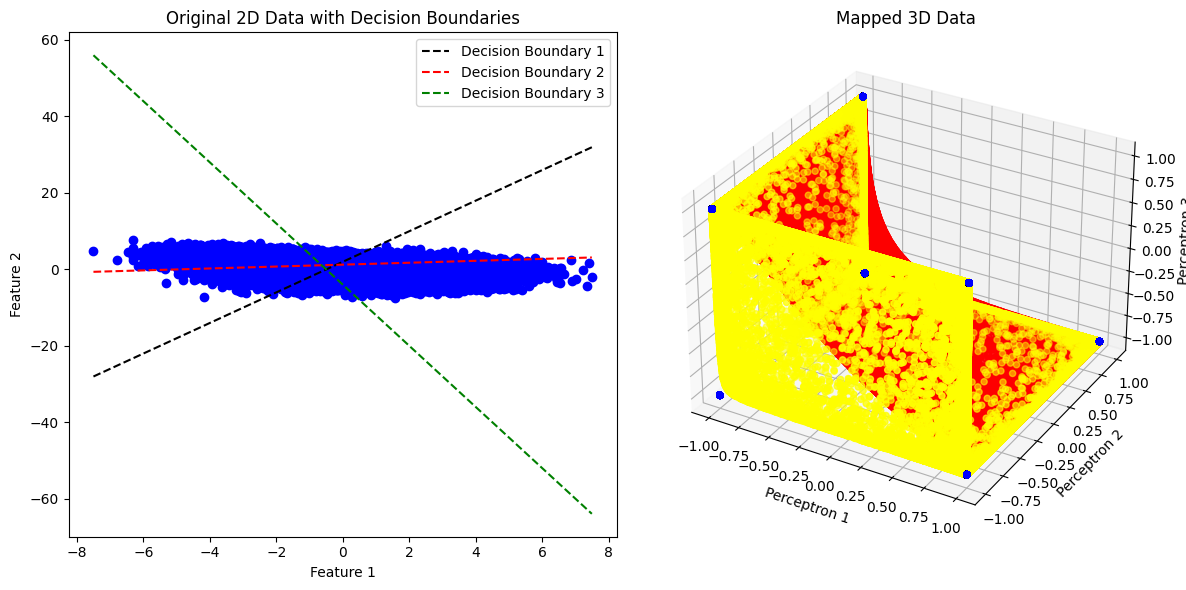

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# 두 클러스터를 생성하는 데이터
mean1 = [1, -1]
cov1 = [[1, 2], [-2, 1]]
mean2 = [-1, 1]
cov2 = [[2, -1], [1, -2]]
cluster1 = np.random.multivariate_normal(mean1, cov1, 100000)
cluster2 = np.random.multivariate_normal(mean2, cov2, 100000)

# 데이터를 하나의 배열로 합치기
data = np.concatenate((cluster1, cluster2), axis=0)

x_vec = np.concatenate((np.ones((data.shape[0],1)),data), axis=1)

# 퍼셉트론 가중치 및 편향
weights = np.array([[4, -1], [-1, 4], [-4, -0.5]])
biases = np.array([2, -5, -2])

# 3개의 퍼셉트론과 시그모이드 함수로 3차원으로 매핑
mapped_data = np.dot(data, weights.T) + biases
mapped_data_3d = 2 / (1 + np.exp(-mapped_data)) -1 
mapped_data_3d_v2 = 2 / (1 + np.exp(-5*mapped_data)) -1 
mapped_data_step = np.where(mapped_data >=0, 1, -1 )

# 시각화
fig = plt.figure(figsize=(12, 6))

# 2차원 데이터
ax1 = fig.add_subplot(121)
ax1.scatter(data[:, 0], data[:, 1], c='blue', marker='o')

# 결정 경계 플로팅
x_vals = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), 1000)
y_vals = -(weights[0, 0] * x_vals + biases[0]) / weights[0, 1]
ax1.plot(x_vals, y_vals, color='black', linestyle='--', label='Decision Boundary 1')

y_vals = -(weights[1, 0] * x_vals + biases[1]) / weights[1, 1]
ax1.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary 2')

y_vals = -(weights[2, 0] * x_vals + biases[2]) / weights[2, 1]
ax1.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision Boundary 3')

ax1.set_title('Original 2D Data with Decision Boundaries')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()

# 3차원으로 매핑된 데이터
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(mapped_data_3d[:, 0], mapped_data_3d[:, 1], mapped_data_3d[:, 2], c='red', marker='o')
ax2.scatter(mapped_data_3d_v2[:, 0], mapped_data_3d_v2[:, 1], mapped_data_3d_v2[:, 2], c='yellow', marker='o')
ax2.scatter(mapped_data_step[:,0], mapped_data_step[:,1], mapped_data_step[:,2], c='blue', marker='o')
ax2.set_title('Mapped 3D Data')
ax2.set_xlabel('Perceptron 1')
ax2.set_ylabel('Perceptron 2')
ax2.set_zlabel('Perceptron 3')

plt.tight_layout()
plt.show()
